# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [4]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df["title_lenght"] = df["title"].apply(len)
df["title_lenght"]

0      24
1      13
2      22
3      15
4      12
       ..
974     7
975    27
976    47
977    11
978    11
Name: title_lenght, Length: 979, dtype: int64

In [11]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df["title_lenght"].mean()
print(f"Media: {media}")
moda = df["title_lenght"].mode()
print(f"Moda: {moda}")
mediana = df["title_lenght"].median()
print(f"Mediana: {mediana}")

Media: 15.481103166496425
Moda: 0    12
Name: title_lenght, dtype: int64
Mediana: 14.0


In [21]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df["title_lenght"].max() - df["title_lenght"].min()
varianza = np.var(df["title_lenght"])
desv_estandar = np.std(df["title_lenght"])
print("rango:", {rango})
print("varianza:", {varianza})
print("desviacion estandar:", {desv_estandar})

rango: {np.int64(67)}
varianza: {np.float64(72.03309541223715)}
desviacion estandar: {np.float64(8.487231316055734)}


In [24]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = df['title_lenght'].skew()
print(f"Asimetría: {asimetria}")
curtosis = df['title_lenght'].kurt()
print(f"Curtosis: {curtosis}")

Asimetría: 1.5252523464631278
Curtosis: 3.8122887061291544


In [25]:
# Imprime el título más corto y el título más largo según su longitud
titulo_corto = df.loc[df['title_lenght'].idxmin(), 'title']
titulo_largo = df.loc[df['title_lenght'].idxmax(), 'title']
print("Título más corto:", titulo_corto)
print("Título más largo:", titulo_largo)

Título más corto: M
Título más largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


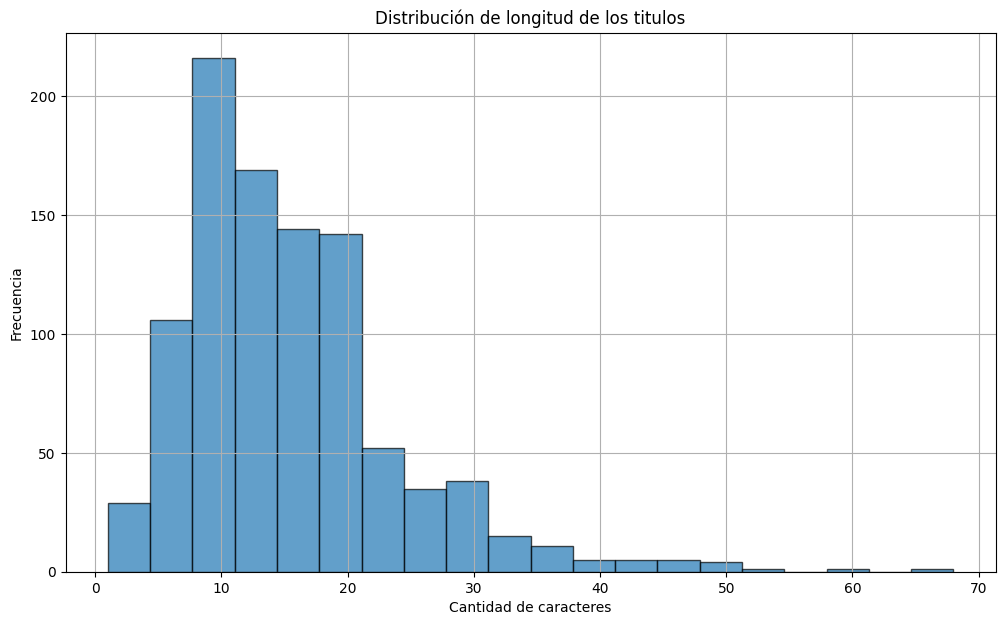

In [31]:
# grafica tus resultados
plt.figure(figsize=(12, 7))
plt.hist(df["title_lenght"], bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribución de longitud de los titulos")
plt.xlabel("Cantidad de caracteres")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [34]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
lista = [10, 13, 14, 18, 22]

In [35]:
# Calcula la media de los 5 valores
media = sum(lista)/len(lista)
print("media:", {media})

media: {15.4}


In [37]:
# Calcula las diferencias al cuadrado con respecto a la media
suma = sum((x - media)**2 for x in lista)
print("suma de diferencias al cuadrado:", {suma})

suma de diferencias al cuadrado: {87.19999999999999}


In [38]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varianza = suma / len(lista)
desviacion = varianza**0.5
print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desviacion}")

Varianza: 17.439999999999998
Desviación estándar: 4.176122603564219
